<a href="https://colab.research.google.com/github/RaveeshSharma/Learn/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/2812442552_3eed5fb9f2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2365428551_39f83f10bf_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3506866918_61dd5fc53b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5434742166_35773eba57_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2536529152_33ef3ee078_n.jpg')]

In [8]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3751835302_d5a03f55e8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg')]

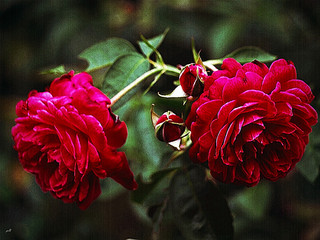

In [11]:
PIL.Image.open(str(roses[1]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5193918046_d44e4fcd75_m.jpg'

array([[[ 65, 118, 185],
        [ 56, 110, 181],
        [ 63, 117, 194],
        ...,
        [228, 231, 236],
        [213, 233, 234],
        [222, 237, 240]],

       [[ 73, 127, 192],
        [ 64, 119, 188],
        [ 55, 113, 185],
        ...,
        [220, 239, 242],
        [203, 235, 234],
        [216, 237, 238]],

       [[ 76, 131, 192],
        [ 67, 123, 188],
        [ 56, 115, 184],
        ...,
        [222, 237, 239],
        [217, 230, 232],
        [229, 239, 239]],

       ...,

       [[ 48,  75, 126],
        [ 55,  77, 118],
        [ 43,  76, 121],
        ...,
        [172, 204, 233],
        [189, 228, 242],
        [ 23,  38, 110]],

       [[ 51,  74, 122],
        [ 33,  66,  99],
        [ 36,  68, 109],
        ...,
        [ 47,  73,  90],
        [215, 240, 255],
        [ 75,  92, 159]],

       [[ 55,  76, 131],
        [ 53,  89, 129],
        [ 41,  71, 120],
        ...,
        [  0,   4,  12],
        [206, 220, 239],
        [166, 221, 228]]], dtype=uint8)
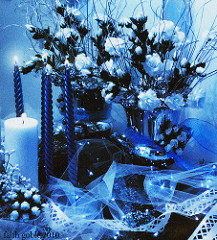

In [18]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 82s 937ms/step - loss: 1.3715 - accuracy: 0.3899
Epoch 2/10
86/86 [==============================] - 80s 927ms/step - loss: 1.0352 - accuracy: 0.5799
Epoch 3/10
86/86 [==============================] - 81s 938ms/step - loss: 0.8724 - accuracy: 0.6617
Epoch 4/10
86/86 [==============================] - 79s 915ms/step - loss: 0.6730 - accuracy: 0.7489
Epoch 5/10
86/86 [==============================] - 80s 937ms/step - loss: 0.4594 - accuracy: 0.8296
Epoch 6/10
86/86 [==============================] - 84s 972ms/step - loss: 0.2429 - accuracy: 0.9201
Epoch 7/10
86/86 [==============================] - 79s 916ms/step - loss: 0.1589 - accuracy: 0.9440
Epoch 8/10
86/86 [==============================] - 84s 979ms/step - loss: 0.0692 - accuracy: 0.9800
Epoch 9/10
86/86 [==============================] - 81s 939ms/step - loss: 0.0444 - accuracy: 0.9873
Epoch 10/10
86/86 [==============================] - 81s 938ms/step - loss: 0.0308 - accura

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 256ms/step - loss: 1.9613 - accuracy: 0.6394


[1.9613417387008667, 0.6394335627555847]

we will do image augmentation to improve accuracy


In [29]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 97s 1s/step - loss: 1.4092 - accuracy: 0.3823
Epoch 2/10
86/86 [==============================] - 97s 1s/step - loss: 1.1042 - accuracy: 0.5472
Epoch 3/10
86/86 [==============================] - 97s 1s/step - loss: 0.9968 - accuracy: 0.6065
Epoch 4/10
86/86 [==============================] - 95s 1s/step - loss: 0.9496 - accuracy: 0.6326
Epoch 5/10
86/86 [==============================] - 97s 1s/step - loss: 0.8854 - accuracy: 0.6566
Epoch 6/10
86/86 [==============================] - 98s 1s/step - loss: 0.8060 - accuracy: 0.6933
Epoch 7/10
86/86 [==============================] - 104s 1s/step - loss: 0.7611 - accuracy: 0.7100
Epoch 8/10
86/86 [==============================] - 96s 1s/step - loss: 0.7400 - accuracy: 0.7188
Epoch 9/10
86/86 [==============================] - 94s 1s/step - loss: 0.6796 - accuracy: 0.7471
Epoch 10/10
86/86 [==============================] - 94s 1s/step - loss: 0.6474 - accuracy: 0.7493


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 288ms/step - loss: 0.7954 - accuracy: 0.7070


[0.7953794002532959, 0.7069717049598694]